In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from scipy.stats import boxcox
%matplotlib inline
data = pd.read_csv('/home/huster/员工离职训练赛/pfm_train.csv')

In [3]:
# 先进行一个简单的编码
# 取值的大小是否有含义  有的话要用LabelEncoder
oh_list = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']

one_hot = pd.get_dummies(data[oh_list])
data = data.join(one_hot)
data.drop(oh_list,axis = 1,inplace = True)


# log 变换需要处理一下  
# 还有一些特征的离散化需要处

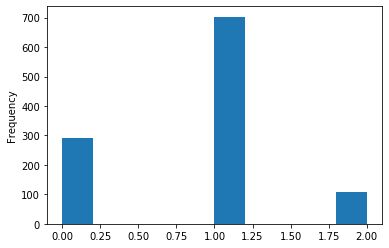

In [4]:
#  data['Age'],_ = boxcox(data['Age'])
# data['Age'] = pd.cut(data['Age'],[0,15,30,50,100],labels = ['yong','build','mid','old'])
# data['Age'] = LabelEncoder().fit_transform(data['Age'])
# data['Age'].plot(kind = 'hist')

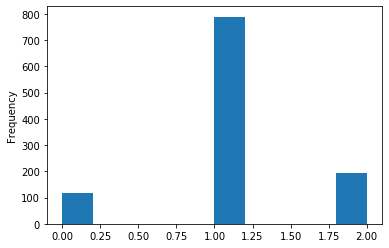

In [5]:
data['MonthlyIncome'] = pd.cut(data['MonthlyIncome'],3,labels = ['low','mid','high'])
data['MonthlyIncome'] = LabelEncoder().fit_transform(data['MonthlyIncome'])
data['MonthlyIncome'].plot(kind = 'hist')

# Feature Selection

In [6]:
# https://github.com/WillKoehrsen/feature-selector/blob/master/Feature%20Selector%20Usage.ipynb

# Model

In [7]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
# metirc
from sklearn import metrics
#  用一用Lr  每用一个模型 要去摸清楚这个模型

In [8]:
label = data['Attrition']
data.drop(['Attrition'],axis = 1,inplace = True)

In [9]:
# X_train, X_valid,Y_train,Y_valid = train_test_split(data,label,test_size = 0.2,stratify = label)
# clf = LogisticRegression().fit(X_train,Y_train)
# res = clf.predict(X_train)
# metrics.roc_auc_score(np.asarray(res),np.asarray(Y_train))

In [10]:
clf = LogisticRegression().fit(data,label)
res = clf.predict(data)
metrics.roc_auc_score(np.asarray(res),np.asarray(label))

/home/huster/.conda/envs/test-36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8499138191272848

In [60]:
# 交叉验证的话是对超参数进行调整